In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
dataset_url="https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gokulravik
Your Kaggle Key: ··········


100%|██████████| 2.29G/2.29G [00:18<00:00, 136MB/s]


In [ ]:
import os
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import cv2
import matplotlib.pyplot as plt
#from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.efficientnet import EfficientNetB0, EfficientNetB7
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
train_path = "/content/chest-xray-pneumonia/chest_xray/chest_xray/train"
val_path = "/content/chest-xray-pneumonia/chest_xray/chest_xray/val"
test_path = "/content/chest-xray-pneumonia/chest_xray/chest_xray/test"

In [ ]:
train_path

'/content/chest-xray-pneumonia/chest_xray/chest_xray/train'

In [ ]:
test_path

'/content/chest-xray-pneumonia/chest_xray/chest_xray/test'

In [ ]:
val_path

'/content/chest-xray-pneumonia/chest_xray/chest_xray/val'

In [ ]:
normal = glob.glob("/content/chest-xray-pneumonia/chest_xray/chest_xray/train/NORMAL/*")
pneumonia = glob.glob("/content/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA/*")

In [ ]:
number_of_normal_img = len(normal)
number_of_pneumonia_img = len(pneumonia)

print('number of normal images:', number_of_normal_img)
print('number of pneumonia images:', number_of_pneumonia_img)
print('number of total images:',number_of_normal_img + number_of_pneumonia_img )

number of normal images: 1341
number of pneumonia images: 3875
number of total images: 5216


<Axes: >

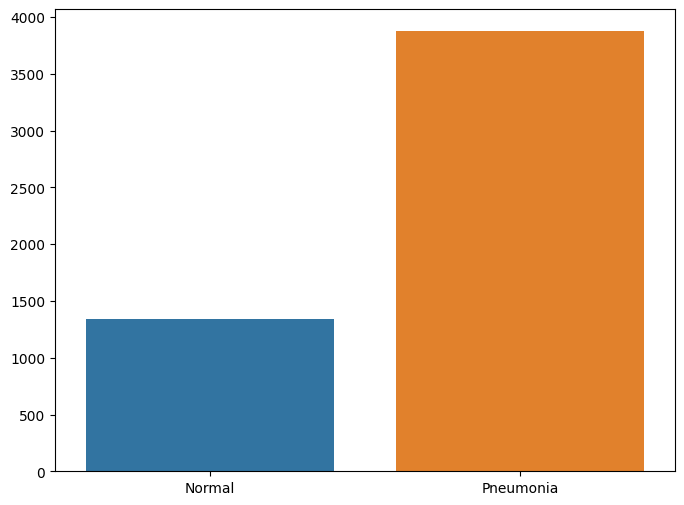

In [ ]:

#Visualization

plt.figure(figsize=(8,6))
sns.barplot(x = ['Normal', 'Pneumonia'], y = [number_of_normal_img, number_of_pneumonia_img])

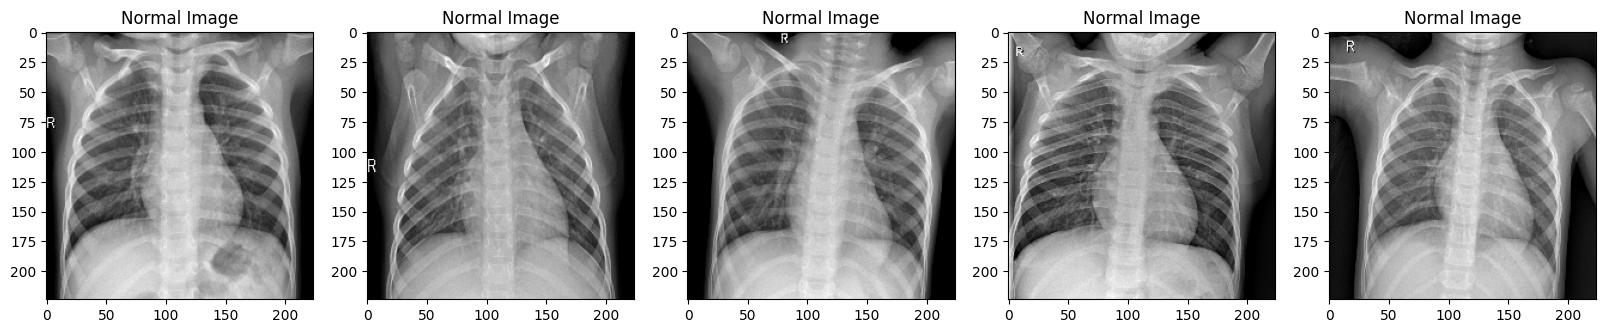

In [ ]:
fig, axes = plt.subplots(ncols=5, figsize=(20,15), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(normal[i])
    img = cv2.resize(img, (224,224))
    ax.imshow(img)
    ax.set_title("Normal Image")

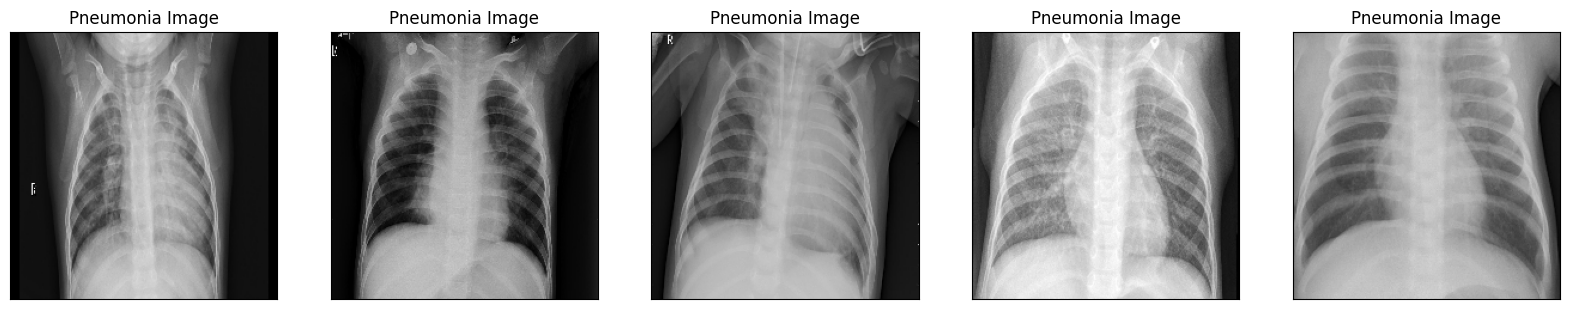

In [ ]:
fig, axes = plt.subplots(ncols=5, figsize=(20,15), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    img = cv2.imread(pneumonia[i])
    img = cv2.resize(img, (224,224))
    ax.imshow(img)
    ax.set_title("Pneumonia Image")

In [ ]:
img_width,img_height=150,150
train_data_dir=r'/content/chest-xray-pneumonia/chest_xray/train'
validation_data_dir=r'/content/chest-xray-pneumonia/chest_xray/val'
test_data_dir=r'/content/chest-xray-pneumonia/chest_xray/test'
nb_validation_sample=20
epochs=25
batch_size=20

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
  input_shape=(3,img_width,img_height)
else:
  input_shape=(img_width,img_height,3)

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(150,150),batch_size=20,class_mode='sparse')
validation_generator=train_datagen.flow_from_directory(validation_data_dir,target_size=(150,150),batch_size=20,class_mode='sparse')
test_generator=test_datagen.flow_from_directory(test_data_dir,target_size=(150,150),batch_size=20,class_mode='sparse')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


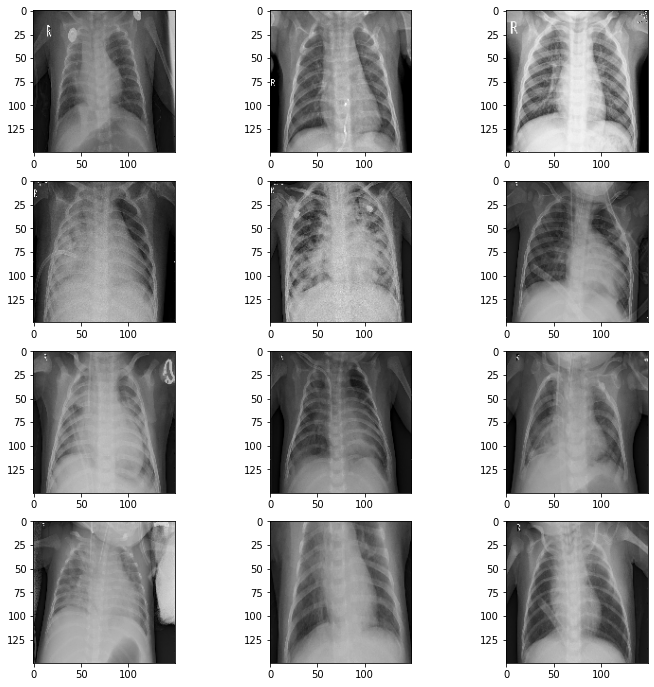

In [ ]:
'''
plt.figure(figsize=(12,12))
for i in  range(0,12):
  plt.subplot(4,3,i+1)
  for x,y in train_generator:
    image=x[0]
    plt.imshow(image)
    break

plt.show()'''

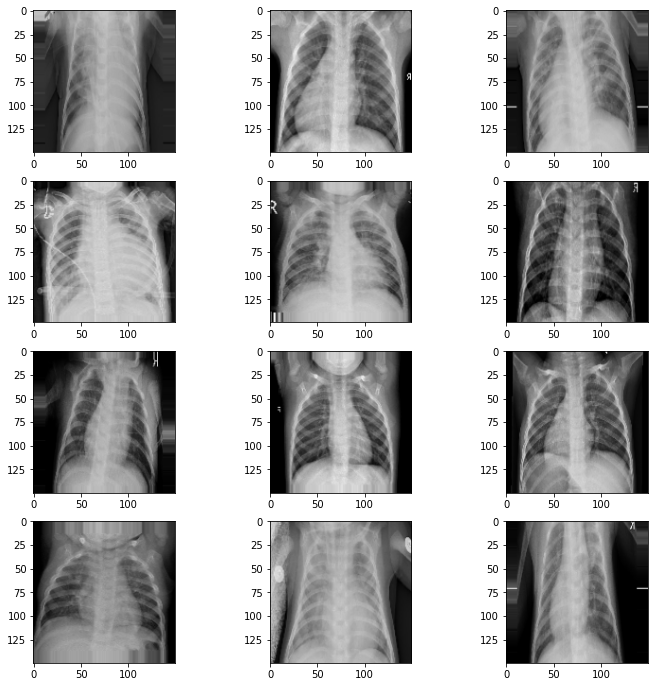

In [ ]:
'''plt.figure(figsize=(12,12))
for i in  range(0,12):
  plt.subplot(4,3,i+1)
  for x,y in test_generator:
    image=x[0]
    plt.imshow(image)
    break

plt.show()'''

In [ ]:
model2=Sequential()
model2.add(Conv2D(32,(3,3),input_shape=input_shape))#63 neurons with 3*3 filter
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))#maxpooling2D helps to reduce the size of the data
model2.add(Dropout(0.25))

model2.add(Conv2D(64,(3,3),activation='relu'))

model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Flatten())#converts multidimensional array to 1d channel
model2.add(Dense(512,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))
model2.add(Dense(1,activation='sigmoid'))#2 because wee have cat and dog classes

In [ ]:
#compile the basic cnn model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])#like fit_transform in ml
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)      

In [ ]:
earlystop=EarlyStopping(patience=10)
#ReduceLROnPlateau=reduce learning rate when a metric has stopped improving
learning_rate_reduction=ReduceLROnPlateau(monitor='val_acc',
                                          patience=2,
                                          verbose=1,
                                          factor=0.5,
                                          min_lr=0.1)

callbacks=[earlystop,learning_rate_reduction]

In [ ]:
training =model2.fit_generator(train_generator,epochs=25,steps_per_epoch=210,
                              validation_data=validation_generator,
                              validation_steps=nb_validation_sample,callbacks=callbacks)

<ipython-input-24-2f032af1df82>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training =model2.fit_generator(train_generator,epochs=25,steps_per_epoch=210,


Epoch 1/25
210/210 [==============================] - ETA: 0s - loss: 0.2077 - accuracy: 0.9228

210/210 [==============================] - 362s 2s/step - loss: 0.2077 - accuracy: 0.9228 - val_loss: 82.9375 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/25
210/210 [==============================] - ETA: 0s - loss: 0.1047 - accuracy: 0.9610

210/210 [==============================] - 363s 2s/step - loss: 0.1047 - accuracy: 0.9610 - lr: 0.0010
Epoch 3/25
210/210 [==============================] - ETA: 0s - loss: 0.0810 - accuracy: 0.9690

210/210 [==============================] - 362s 2s/step - loss: 0.0810 - accuracy: 0.9690 - lr: 0.0010
Epoch 4/25
210/210 [==============================] - ETA: 0s - loss: 0.0815 - accuracy: 0.9700

210/210 [==============================] - 360s 2s/step - loss: 0.0815 - accuracy: 0.9700 - lr: 0.0010
Epoch 5/25
210/210 [==============================] - ETA: 0s - loss: 0.0930 - accuracy: 0.9681

210/210 [==============================] - 359s 2s/step - loss: 0.0930 - accuracy: 0.9681 - lr: 0.0010
Epoch 6/25
210/210 [==============================] - ETA: 0s - loss: 0.0737 - accuracy: 0.9712

210/210 [==============================] - 361s 2s/step - loss: 0.0737 - accuracy: 0.9712 - lr: 0.0010
Epoch 7/25
210/210 [==============================] - ETA: 0s - loss: 0.0621 - accuracy: 0.9771

210/210 [==============================] - 358s 2s/step - loss: 0.0621 - accuracy: 0.9771 - lr: 0.0010
Epoch 8/25
210/210 [==============================] - ETA: 0s - loss: 0.0650 - accuracy: 0.9762

210/210 [==============================] - 354s 2s/step - loss: 0.0650 - accuracy: 0.9762 - lr: 0.0010
Epoch 9/25
210/210 [==============================] - ETA: 0s - loss: 0.0580 - accuracy: 0.9790

210/210 [==============================] - 354s 2s/step - loss: 0.0580 - accuracy: 0.9790 - lr: 0.0010
Epoch 10/25
210/210 [==============================] - ETA: 0s - loss: 0.0538 - accuracy: 0.9828

210/210 [==============================] - 356s 2s/step - loss: 0.0538 - accuracy: 0.9828 - lr: 0.0010
Epoch 11/25
210/210 [==============================] - ETA: 0s - loss: 0.0490 - accuracy: 0.9814

210/210 [==============================] - 361s 2s/step - loss: 0.0490 - accuracy: 0.9814 - lr: 0.0010
Epoch 12/25
210/210 [==============================] - ETA: 0s - loss: 0.0463 - accuracy: 0.9821

210/210 [==============================] - 357s 2s/step - loss: 0.0463 - accuracy: 0.9821 - lr: 0.0010
Epoch 13/25
210/210 [==============================] - ETA: 0s - loss: 0.0359 - accuracy: 0.9857

210/210 [==============================] - 356s 2s/step - loss: 0.0359 - accuracy: 0.9857 - lr: 0.0010
Epoch 14/25
210/210 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9859

210/210 [==============================] - 354s 2s/step - loss: 0.0362 - accuracy: 0.9859 - lr: 0.0010
Epoch 15/25
210/210 [==============================] - ETA: 0s - loss: 0.0453 - accuracy: 0.9850

210/210 [==============================] - 348s 2s/step - loss: 0.0453 - accuracy: 0.9850 - lr: 0.0010
Epoch 16/25
210/210 [==============================] - ETA: 0s - loss: 0.0454 - accuracy: 0.9840

210/210 [==============================] - 349s 2s/step - loss: 0.0454 - accuracy: 0.9840 - lr: 0.0010
Epoch 17/25
210/210 [==============================] - ETA: 0s - loss: 0.0396 - accuracy: 0.9874

210/210 [==============================] - 346s 2s/step - loss: 0.0396 - accuracy: 0.9874 - lr: 0.0010
Epoch 18/25
210/210 [==============================] - ETA: 0s - loss: 0.0356 - accuracy: 0.9876

210/210 [==============================] - 349s 2s/step - loss: 0.0356 - accuracy: 0.9876 - lr: 0.0010
Epoch 19/25
210/210 [==============================] - ETA: 0s - loss: 0.0283 - accuracy: 0.9900

210/210 [==============================] - 350s 2s/step - loss: 0.0283 - accuracy: 0.9900 - lr: 0.0010
Epoch 20/25
210/210 [==============================] - ETA: 0s - loss: 0.0338 - accuracy: 0.9860

210/210 [==============================] - 349s 2s/step - loss: 0.0338 - accuracy: 0.9860 - lr: 0.0010
Epoch 21/25
210/210 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9898

210/210 [==============================] - 349s 2s/step - loss: 0.0253 - accuracy: 0.9898 - lr: 0.0010
Epoch 22/25
210/210 [==============================] - ETA: 0s - loss: 0.0249 - accuracy: 0.9926

210/210 [==============================] - 348s 2s/step - loss: 0.0249 - accuracy: 0.9926 - lr: 0.0010
Epoch 23/25
210/210 [==============================] - ETA: 0s - loss: 0.0990 - accuracy: 0.9695

210/210 [==============================] - 348s 2s/step - loss: 0.0990 - accuracy: 0.9695 - lr: 0.0010
Epoch 24/25
210/210 [==============================] - ETA: 0s - loss: 0.0712 - accuracy: 0.9762

210/210 [==============================] - 354s 2s/step - loss: 0.0712 - accuracy: 0.9762 - lr: 0.0010
Epoch 25/25
210/210 [==============================] - ETA: 0s - loss: 0.0468 - accuracy: 0.9828

210/210 [==============================] - 347s 2s/step - loss: 0.0468 - accuracy: 0.9828 - lr: 0.0010


evaluate metrics

In [ ]:
print("Loss of the model is" , model2.evaluate(test_generator))

32/32 [==============================] - 15s 458ms/step - loss: 12.8195 - accuracy: 0.6250
Loss of the model is [12.819522857666016, 0.625]


In [ ]:
pred=model2.predict(test_generator)

32/32 [==============================] - 12s 365ms/step


In [ ]:
pred

NameError: ignored

In [ ]:
pred.shape

In [ ]:
print("Plotting accuracy versus epoch")
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
print("The model is being evaluated")
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
print("The accuracy of the model is:")
print(test_acc)